<a href="https://colab.research.google.com/github/LucjanSakowicz/data-science-bootcamp/blob/main/09_exercises/131_140_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 131](#1)
* [Ćwiczenie 132](#2)
* [Ćwiczenie 133](#3)
* [Ćwiczenie 134](#4)
* [Ćwiczenie 135](#5)
* [Ćwiczenie 136](#6)
* [Ćwiczenie 137](#7)
* [Ćwiczenie 138](#8)
* [Ćwiczenie 139](#9)
* [Ćwiczenie 140](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__
sns.set()

### <a name='1'></a> Ćwiczenie 131
Wczytaj plik csv do obiektu DataFrame o nazwie _df_raw_ z domyślnymi parametrami funkcji _pd.read_csv()_ i wyświetl 5 pierwszych wierszy.   
Adres url do pliku:
* https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv


In [36]:
df_raw = pd.read_csv('https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv')
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Skopiuj obiekt _df_raw_ do zmiennej _df_.

In [72]:
df = df_raw.copy()

Wyświetl podstawowe informacje na temat obiektu _df_.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Wyznacz liczbę brakujących elementów (_np.nan_) w obiekcie _df_ dla każdej zmiennej.

In [111]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <a name='2'></a> Ćwiczenie 132
Zwróć uwagę na kolumnę _TotalCharges_. Typ tej kolumny to _object_. Spróbuj odgadnąć dlaczego tak się stało.

__Wskazówka:__
Spójrz na rozkład wartości zmiennej.

In [113]:
df['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

Zauważ, że na drugim miejscu mamy 11 wartości pustych. Aby lepiej to zobaczyć, patrz poniżej.

In [65]:
df['TotalCharges'].value_counts()[:3].index

Index([' ', '20.2', '19.75'], dtype='object')

Jest to znak spacji, który wkradł się w nasze dane. Spowodował, że pandas odczytał całą kolumnę jako tekst. Jako analityk musimy z takimi problemami sobie dawać radę. Spróbuj zamienić brakujące wartości kolumny _TotalCharges_ na jej medianę.

In [115]:
# Obliczenie mediany dla kolumny TotalCharges
median = df['TotalCharges'][df['TotalCharges'] != ' '].median()
print(median)
# Wypełnienie brakujących wartości medianą
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = median

# Konwersja kolumny TotalCharges do typu float
df['TotalCharges'] = df['TotalCharges'].astype(float)

1397.475


Sprawdź, czy typ został poprawnie zmieniony.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### <a name='3'></a> Ćwiczenie 133
Kolumny z poniższej listy _categorical_ przekształć do typu _category_.

In [77]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df[categorical] = df[categorical].astype("category")

Kolumny z poniższej listy _numerical_ przekształć do typu _float_.

In [78]:
numerical = ['tenure', 'MonthlyCharges']

df[numerical] = df[numerical].astype(float)

Ustaw kolumnę _customerID_ jako indeks obiektu _df_ oraz wyświetl info o obiekcie _df_.

In [79]:
df.set_index('customerID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

### <a name='4'></a> Ćwiczenie 134
Użyj meteody _describe()_ do wyświetlenia podstawowych statystyk obiektu _df_.

In [80]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Zauważ, że są to tylko zmienne numeryczne. Wyświetl podstawowe statystyki zmiennych kategorycznych przekazując odpowiedni parametr _include_ metody _describe()_.

In [81]:
df.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Zauważ, że są to nieco inne statystyki niż dla zmiennych numerycznych.

### <a name='5'></a> Ćwiczenie 135 
Znajdź rozkład wartości zmiennej _Churn_.

In [82]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Zbuduj wykres kołowy rozkładu wartości zmiennej _Churn_.

<Axes: ylabel='Churn'>

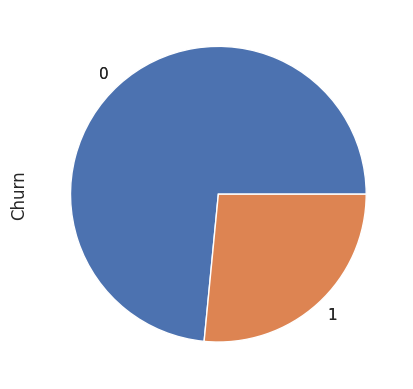

In [116]:
df.groupby('Churn').size().plot(kind='pie')

#lub

df['Churn'].value_counts().plot(kind='pie')

### <a name='6'></a> Ćwiczenie 136
Zbuduj wykres _pairplot()_ z biblioteki _seaborn_. Przekaż zmienne:
* tenure
* MonthlyCharges
* TotalCharges  


oraz parametr: _hue='Churn'_.

__Wskazówka:__
https://seaborn.pydata.org/generated/seaborn.pairplot.html


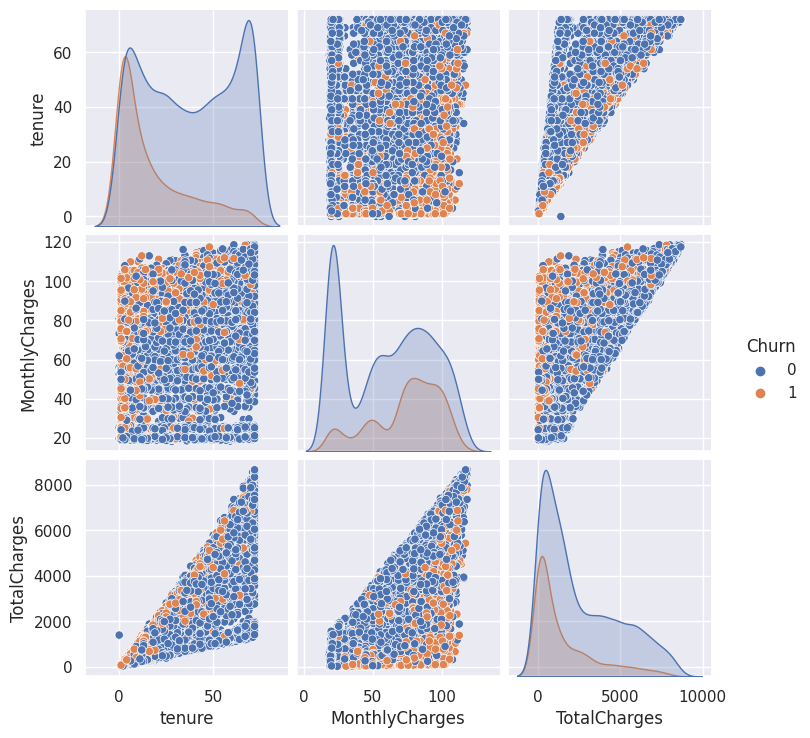

In [117]:
sns.pairplot(df, vars = ['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')

### <a name='7'></a> Ćwiczenie 137
Dokonaj mapowania kolumny _Churn_ odpowiednio:
* 'Yes' -> 1
* 'No' -> 0

Wyświetl 5 pierwszych wierszy obiektu _df_.

In [118]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

# lub

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,NaN
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN


### <a name='8'></a> Ćwiczenie 138
Wyznacz macierz korelacji dla obiektu _df_.

In [102]:
df.corr()

<ipython-input-102-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
Churn,-0.352229,0.193356,-0.199037,1.000000


### <a name='9'></a> Ćwiczenie 139
Znajdź rozkład zmiennej _PaymentMethod_.

In [104]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Pogrupuj dane po zmiennej _PaymentMethod_ i policz średnią wartość dla zmiennej _TotalCharges_.

In [106]:
df.groupby('PaymentMethod')['TotalCharges'].mean()

PaymentMethod
Bank transfer (automatic)    3077.121017
Credit card (automatic)      3070.296206
Electronic check             2090.868182
Mailed check                 1056.186104
Name: TotalCharges, dtype: float64

### <a name='10'></a> Ćwiczenie 140
Pobierz próbkę 10-ciu wierszy z obiektu _df_ i zapisz do pliku _sample_10.csv_.

In [119]:
df.sample(10).to_csv('sample_10.csv')

Uruchom poniższą komórkę w celu sprawdzenia.

In [120]:
!cat sample_10.csv

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7554-AKDQF,Female,0,Yes,No,6.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,323.45,
2926-JEJJC,Female,0,No,No,8.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.2,140.95,
7503-ZGUZJ,Male,0,No,No,1.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.65,84.65,
2573-GYRUU,Male,1,Yes,No,48.0,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),91.05,4370.75,
5536-RTPWK,Male,0,Yes,No,49.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.05,4853.75,
6599-GZWCM,Female,0,No,No,13.0,Yes,No,Fiber optic,No